# Inhibition-stabilised network 

Ta-Chu Kao and Guillaume Hennequin 

In this notebook, we inspect some of the key properties of an inhibition-stabilised network (ISN), 
proposed and described in [Hennequin et al., 2014](https://www.sciencedirect.com/science/article/pii/S0896627314003602).


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from plotlib import load_plot_setting, plot_eig
from lib import Gramians 
from scipy.integrate import odeint
load_plot_setting()

In [2]:
# load connectivity matrix W; there are a total of n neurons.
isn_name = "isn"
W = np.loadtxt(f'{isn_name}_W.txt')
n, _ = np.shape(W)
n_e, n_i, p, radius, w0 = np.loadtxt(f'{isn_name}_parameters.txt')

In [20]:
W.shape

(100, 100)

### E-I Connectivity

We plot the connectivity matrix $W$ of an example inhibition-stabilised network. 
Note that the connectivity matrix obeys Dale's rule and has sparse connections.

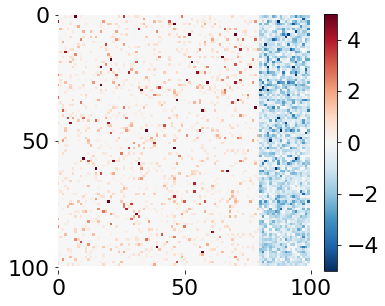

In [3]:
plt.figure(figsize=(5,5))
im = plt.imshow(W,cmap=plt.cm.RdBu_r)
plt.xlim(0,n+1)
plt.ylim(n+1,0)
plt.yticks(np.arange(0,n+1,n/2))
plt.yticks(np.arange(0,n+1,n/2))
plt.box(on=False)
plt.clim(-5,5)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.show()

### Stability
We plot the eigenvalues of $W$ below. Note that the eigenvalue with the largest real part lies left of $1$, which makes $A = I - W$ stable.

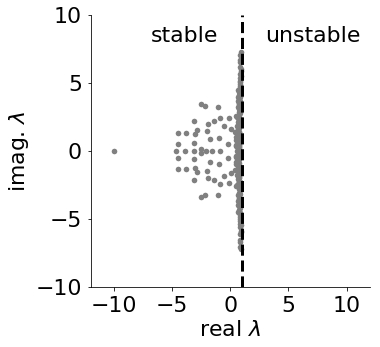

spectral abscissa = 0.899796 < 1


In [4]:
W_evals, _ = np.linalg.eig(W)
plot_eig(W_evals)
print("spectral abscissa = %3f < 1" % max(W_evals.real))

### Sensitive Directions

Consider linear dynamics where the network's activity evolves according to 

$$\displaystyle \dot{x} = Ax,$$

where $A = (I-W)/\tau$. 
To calculate the iniitial directions from which the network dynamics is strongly amplified,
we calculate the observability gramian 

$$\displaystyle Q = \int_0^\infty e^{A^Tt}e^{At} dt$$

by solving the Lyapunov equation:

$$A^TQ + QA + I = 0.$$

Note that the total energy evoked by the dynamics from initial condition $x_0$ is equal to 

$$\displaystyle \epsilon= \int_0^\infty x(t)^Tx(t) dt =\int_0^\infty x_0^T e^{A^Tt}e^{At} x_0 dt = x_0^T Q x_0$$

Since $Q$ is symmetric postive semidefinite, to find the directions $x_0$ that maximises the energy evoked, we simply calculate the eigenvalues and eigenvectors of $Q$;
the top eigenvector of $Q$ is the direction from which the most energy is evoked.




In [5]:
A = W - np.eye(n)
# compute the gramians
G = Gramians(A)
# get the observability gramian OG
OG = G.O
# get the eigenvalues and eigenvectors of the observability gramian
Q_evals = OG.evals
Q_evecs = OG.modes

Next, we plot the total energy evoked if we initialise the system $x_0$ in the $n^{th}$ eigenvector of $Q$.

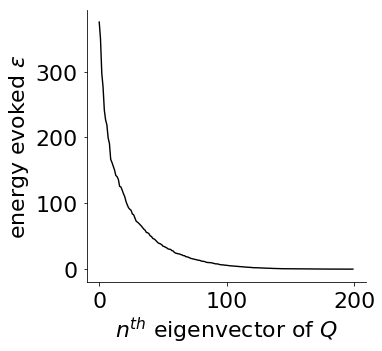

In [6]:
plt.figure(figsize=(5,5))
plt.ylabel("energy evoked $\epsilon$")
plt.xlabel("$n^{th}$ eigenvector of $Q$")
plt.plot(Q_evals, "k")
plt.show()

Below, we plot the trajectories of ten neurons starting from different initial conditions.
Note that the activity transients evoked from the top eigenvectors of $Q$ is much stronger than that evoked from the bottom ones. 

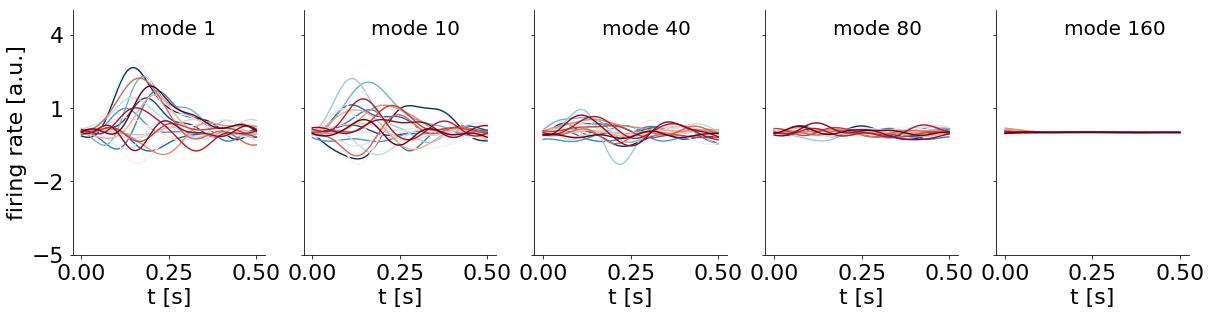

In [25]:
tau = 150e-3
phi = lambda x: x # rate function 
def f(x,t):
    return (-x + W.dot(phi(x))) / tau 
figsize=(20,4.5)
tf = 0.5 # simulate for 500ms
dt = 1e-3  
n_steps = int(tf/dt) + 1
indices = [int(idx) for idx in [0, 0.05*n-1, 0.2*n-1, 0.4*n-1, 0.8*n-1]]

fig, axes = plt.subplots(1,len(indices), figsize=figsize, sharey=True)
axes[0].set_ylabel("firing rate [a.u.]")
axes[0].set_yticks(np.arange(-5,5.1,3))
ts = np.linspace(0,tf,n_steps)
for i, m in enumerate(indices):
    x0 = Q_evecs[:,m]
    xs = odeint(f,x0,ts)
    rs = phi(xs) 
    axes[i].set_ylim(-5,5)
    axes[i].set_xlabel("t [s]")
    axes[i].set_xticks(np.arange(0,0.51,0.25))
    axes[i].text(0.35,0.9, "mode %i" % (m+1), transform=axes[i].transAxes, fontsize=20)
    idxs = range(0,n,10)
    colors=iter(plt.cm.RdBu_r(np.linspace(0,1,len(idxs))))
    for j in idxs:
        c=next(colors)
        axes[i].plot(ts,rs[:,j],c=c)
        
plt.show()

### Summary and outlook 

In this notebook, we analysed the spectrum and thus the stability of an example inhibition stabilised network. By calculating the eigenvectors of observability gramian, we found the directions from which the network evolving linearly is most strongly amplified.
In the next notebook **01_create**, we build an inhibition-stabilised network (ISN) from scratch.